/var/folders/4q/_llryzk94h5ffxwycqfqr4dr0000gn/T/ipykernel_16928/2940012482.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


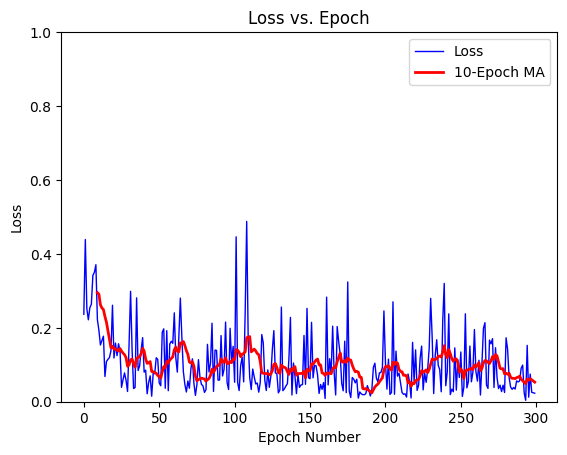

In [91]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt


# Load data
data = pd.read_csv('/Users/katesautel/Documents/Seminar_2024/results.csv')
dfData = pd.DataFrame(data)

loss = pd.read_csv('/Users/katesautel/Documents/Seminar_2024/loss.csv')
dfLoss = pd.DataFrame(loss)


# LOSS PLOT
dfLoss['MA'] = dfLoss['Loss'].rolling(10).mean()

fig, ax = plt.subplots()

ax.plot(dfLoss['Loss'],
        c = 'blue',
        ls = 'solid',
        lw = 1)
ax.plot(dfLoss['MA'],
        c = 'red',
        ls = 'solid',
        lw = 2)

ax.set_title('Loss vs. Epoch')
ax.set_xlabel('Epoch Number')
ax.set_ylabel('Loss')
ax.set_ylim(0, 1)
ax.legend(['Loss', '10-Epoch MA'])

fig.show()

/var/folders/4q/_llryzk94h5ffxwycqfqr4dr0000gn/T/ipykernel_16928/793631853.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


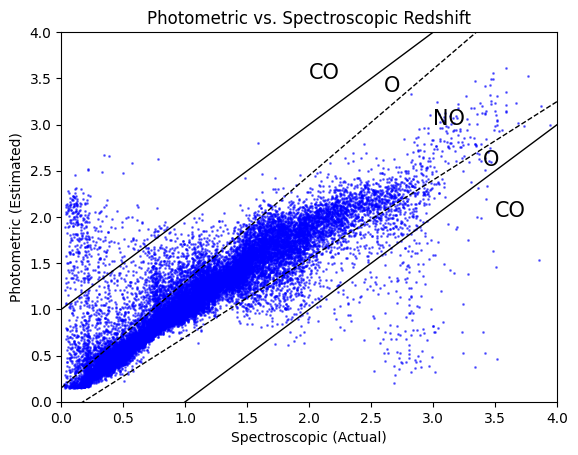

In [92]:
# REGRESSION PLOT
fig, ax = plt.subplots()

ax.scatter(dfData['Spectroscopic'], dfData['Photometric'],
           c = 'blue',
           s = 1,
           alpha = 0.5)

# Outlier guide lines
x1_values = np.linspace(0, 5, 100)
y1_values = 1.15 * x1_values + 0.15
ax.plot(x1_values, y1_values, 
         c = 'black', 
         ls = 'dashed',
         lw = 1)

x2_values = np.linspace(0, 5, 100)
y2_values = 0.85 * x2_values - 0.15
ax.plot(x2_values, y2_values,
         c = 'black',
         ls = 'dashed',
         lw = 1)

# CO guide lines
x3_values = np.linspace(0, 5, 100)
y3_values = 1 + x3_values
ax.plot(x3_values, y3_values,
         c = 'black',
         ls = 'solid',
         lw = 1)

x4_values = np.linspace(0, 5, 100)
y4_values = x4_values - 1
ax.plot(x4_values, y4_values,
         c = 'black',
         ls = 'solid',
         lw = 1)

ax.set_title('Photometric vs. Spectroscopic Redshift')
ax.set_xlabel('Spectroscopic (Actual)')
ax.set_ylabel('Photometric (Estimated)')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
#ax.legend(['Trial', 'O', 'O', 'CO', 'CO'])
ax.text(2, 3.5, 'CO', fontsize = 15)
ax.text(3.5, 2, 'CO', fontsize = 15)
ax.text(2.6, 3.35, 'O', fontsize = 15)
ax.text(3.4, 2.55, 'O', fontsize = 15)
ax.text(3, 3, 'NO', fontsize = 15)

fig.show()

In [93]:
# Print results stats
stats = pd.DataFrame()
stats['Outlier Counts'] = data['Outlier'].value_counts()
stats['Proportion'] = stats['Outlier Counts'] / stats['Outlier Counts'].sum()
stats

,Outlier Counts,Proportion
Outlier,,
NO,25976,0.886281
O,2727,0.093043
CO,606,0.020676


<Axes: title={'center': 'HSC Redshift Distribution'}, xlabel='Spectroscopic Redshift', ylabel='Frequency'>

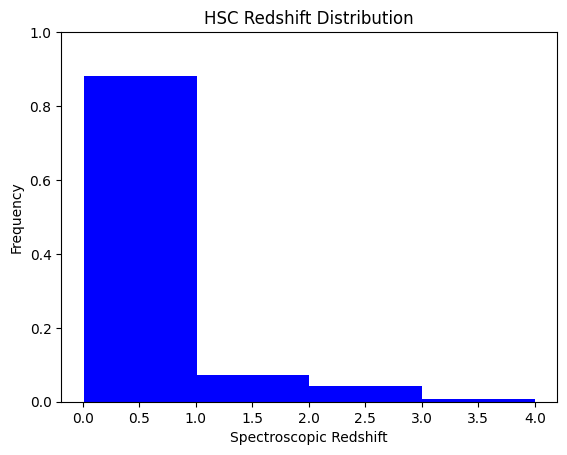

In [103]:
# RAW HSC HISTOGRAM
dfHSC = pd.read_csv('/Users/katesautel/Documents/Seminar_2024/hsc_v6.csv')

dfHSC = dfHSC.rename(columns = {'specz_redshift':'Spectroscopic Redshift'})

dfHSC['Spectroscopic Redshift'].plot.hist(color = 'blue',
                                          title = 'HSC Redshift Distribution',
                                          xlabel = 'Spectroscopic Redshift',
                                          bins = 4,
                                          density = True,
                                          ylim = (0, 1))

<Axes: title={'center': 'COSMOS Redshift Distribution'}, xlabel='Spectroscopic Redshift', ylabel='Frequency'>

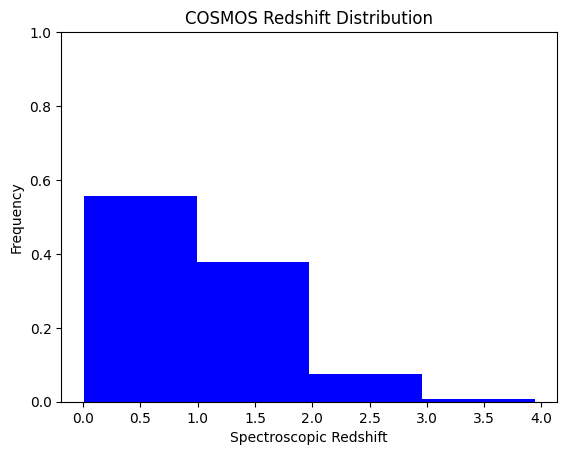

In [104]:
# RAW COSMOS HISTOGRAM
dfCOSMOS = pd.read_csv('/Users/katesautel/Documents/Seminar_2024/rel_z.csv')

dfCOSMOS = dfCOSMOS.rename(columns = {'z':'Spectroscopic Redshift'})

dfCOSMOS['Spectroscopic Redshift'].plot.hist(color = 'blue',
                                             title = 'COSMOS Redshift Distribution',
                                             xlabel = 'Spectroscopic Redshift',
                                             bins = 4,
                                             density = True,
                                             ylim = (0, 1))